# Compressed Sensing

In [14]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
from experiments import *
#np.set_printoptions(threshold=sys.maxsize)

## Check Convergence

## Overparameterization

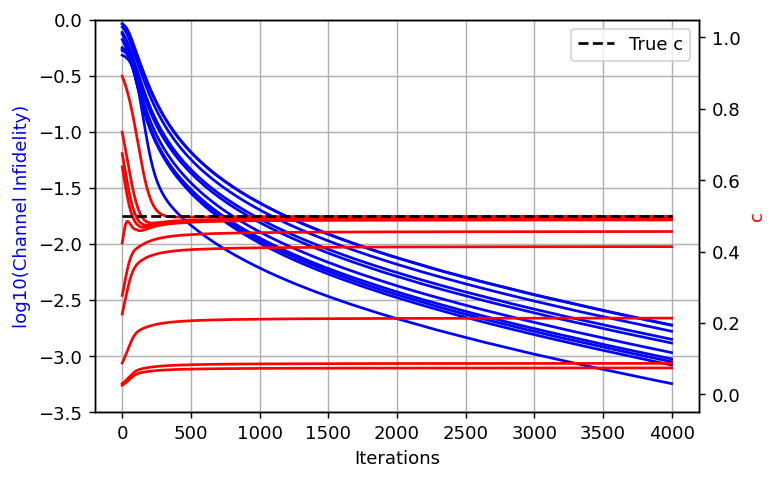

In [37]:
loss_values, c_values = pickle.load(open("../../data/compressed_sensing_overparam.p", "rb"))

fig, ax = plt.subplots(1, 1, dpi = 130, facecolor='w', edgecolor='k')
ax_twin = ax.twinx()

loss_values = 1-loss_values
#loss_values[loss_values<0] = 1e-6

ax.plot(np.log10(loss_values), "b-")

ax.set_xlabel("Iterations")
ax.set_ylabel("log10(Channel Infidelity)", color = "b")
ax.set_ylim([-3.5, 0])

ax_twin.plot(c_values, "r-")
ax_twin.set_ylabel("c", color = "r")
ax_twin.set_ylim([-0.05, 1.05])

lns = ax_twin.plot([0,4000], [0.5, 0.5], "k--", label = "True c")
labs = [l.get_label() for l in lns]
plt.legend(lns, labs)

ax.grid()
plt.show()

## Under-parameterization

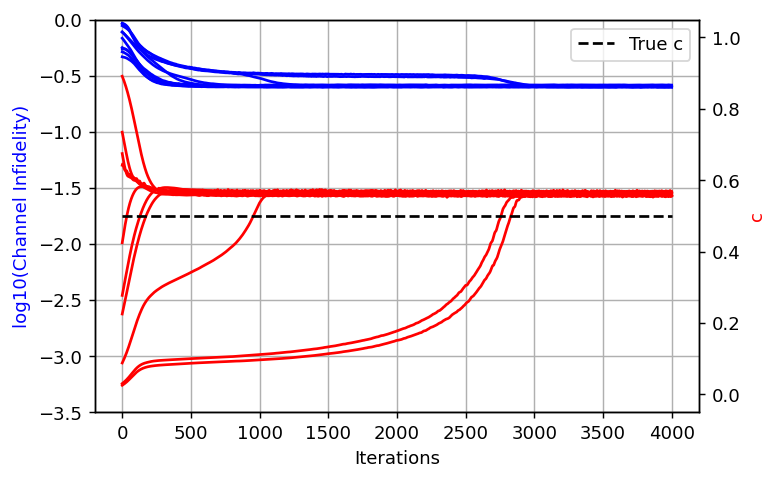

In [38]:
loss_values, c_values = pickle.load(open("../../data/compressed_sensing_underparam.p", "rb"))

fig, ax = plt.subplots(1, 1, dpi = 130, facecolor='w', edgecolor='k')
ax_twin = ax.twinx()

ax.plot(np.log10(1-loss_values), "b-")

ax.set_xlabel("Iterations")
ax.set_ylabel("log10(Channel Infidelity)", color = "b")
ax.set_ylim([-3.5, 0])

ax_twin.plot(c_values, "r-")
ax_twin.set_ylabel("c", color = "r")
ax_twin.set_ylim([-0.05, 1.05])

lns = ax_twin.plot([0,4000], [0.5, 0.5], "k--", label = "True c")
labs = [l.get_label() for l in lns]
plt.legend(lns, labs)

ax.grid()
plt.show()

## Sparse Input
### Generate Data

In [69]:
N_list = [int(16*2**(i/4)) for i in range(21)]

In [70]:
fidelity1, fidelity2 = pickle.load(open("../../data/compressed_sensing_rank4.p", "rb"))
fidelity3, fidelity4 = pickle.load(open("../../data/compressed_sensing_rank8.p", "rb"))
fidelity5, fidelity6 = pickle.load(open("../../data/compressed_sensing_rank16.p", "rb"))

In [84]:
def plots(fidelity):
    fidelity_avg = np.mean(1-fidelity, axis=1)
    log_avg = np.log10(fidelity_avg)
    std = np.std(1-fidelity, axis=1)
    
    factor = np.log10(fidelity_avg + std)/log_avg
    fill1 = factor*log_avg
    fill2 = log_avg/factor
    
    return log_avg, fill1, fill2
    

In [85]:
log_avg1, fill1_1, fill2_1 = plots(fidelity1)
log_avg2, fill1_2, fill2_2 = plots(fidelity2)
log_avg3, fill1_3, fill2_3 = plots(fidelity3)
log_avg4, fill1_4, fill2_4 = plots(fidelity4)
log_avg5, fill1_5, fill2_5 = plots(fidelity5)
log_avg6, fill1_6, fill2_6 = plots(fidelity6)

C:\Users\krist\AppData\Local\Temp\ipykernel_3636\387056691.py:3: RuntimeWarning: invalid value encountered in log10
  log_avg = np.log10(fidelity_avg)
C:\Users\krist\AppData\Local\Temp\ipykernel_3636\387056691.py:6: RuntimeWarning: invalid value encountered in log10
  factor = np.log10(fidelity_avg + std)/log_avg


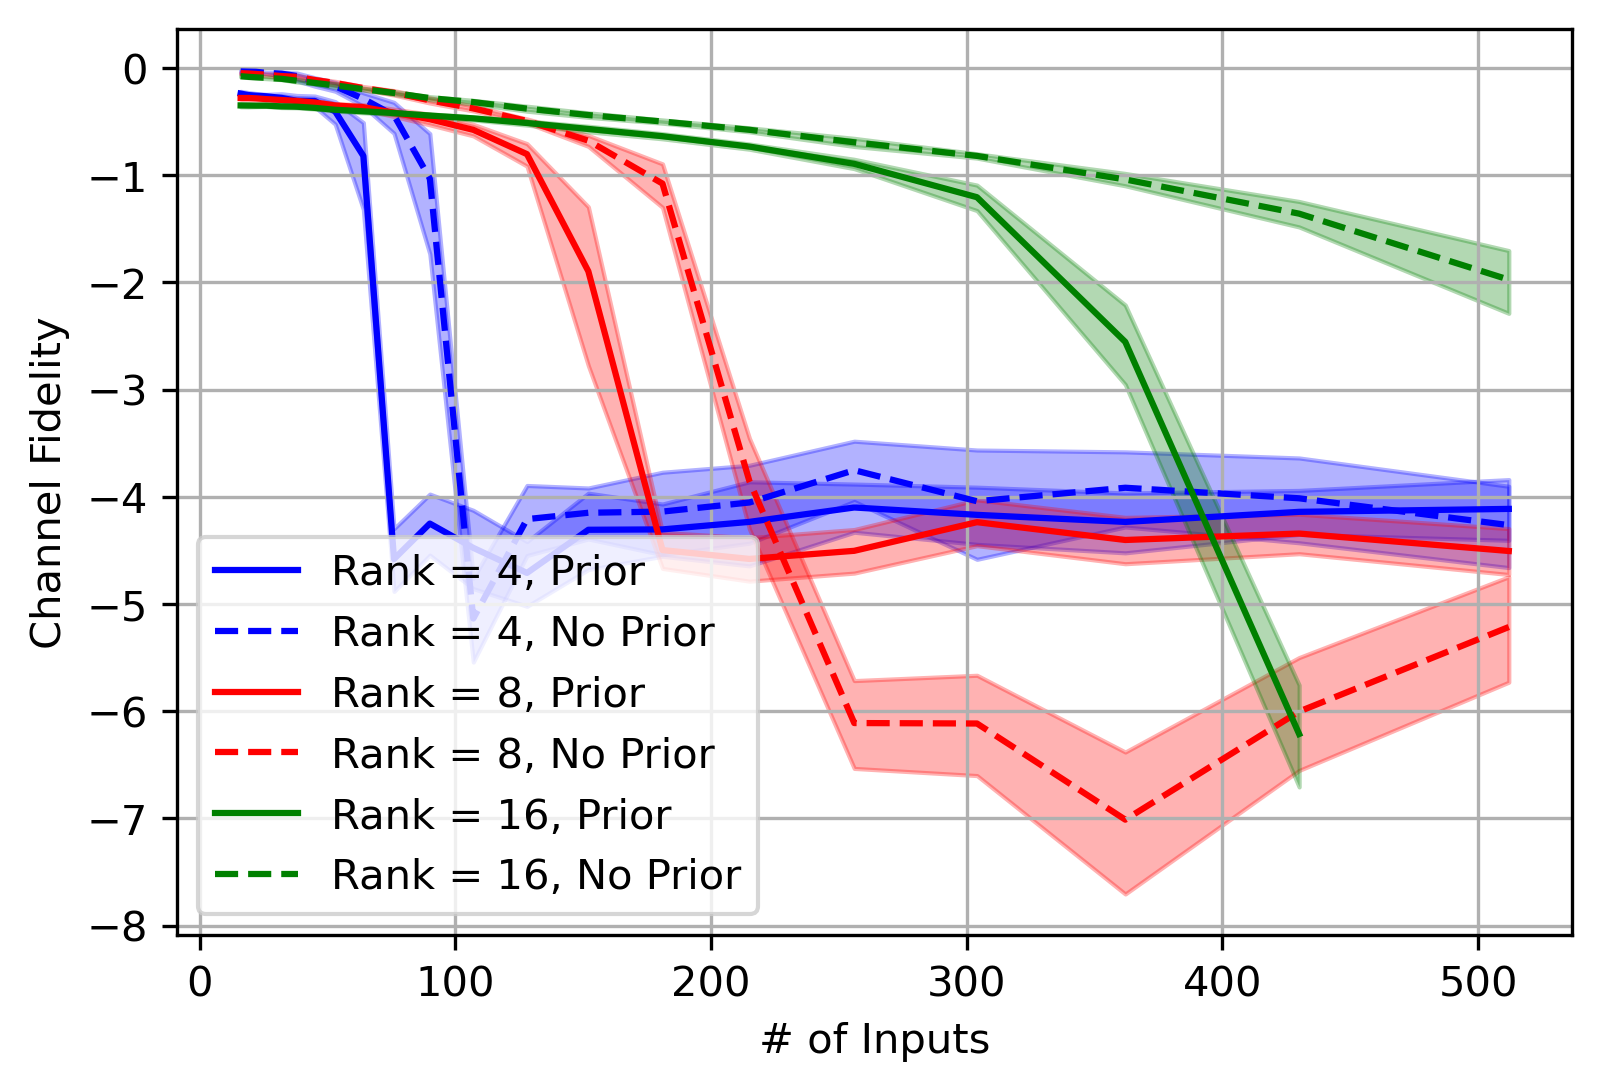

In [92]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.fill_between(N_list, fill1_1, fill2_1, color = "b", alpha=0.3)
plt.plot(N_list, log_avg1, "b-", label = "Rank = 4, Prior")

plt.fill_between(N_list, fill1_2, fill2_2, color = "b", alpha=0.3)
plt.plot(N_list, log_avg2, "b--", label = "Rank = 4, No Prior")

plt.fill_between(N_list, fill1_3, fill2_3, color = "r", alpha=0.3)
plt.plot(N_list, log_avg3, "r-", label = "Rank = 8, Prior")

plt.fill_between(N_list, fill1_4, fill2_4, color = "r", alpha=0.3)
plt.plot(N_list, log_avg4, "r--", label = "Rank = 8, No Prior")

plt.fill_between(N_list, fill1_5, fill2_5, color = "g", alpha=0.3)
plt.plot(N_list, log_avg5, "g-", label = "Rank = 16, Prior")

plt.fill_between(N_list, fill1_6, fill2_6, color = "g", alpha=0.3)
plt.plot(N_list, log_avg6, "g--", label = "Rank = 16, No Prior")

plt.xlabel("# of Inputs")
plt.ylabel("Channel Fidelity")
plt.legend(loc=3)
plt.grid()
plt.show()